In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.regression_utils import adjust_for_inflation
import pandas as pd
from datasets import load_dataset
import tqdm as tqdm

regression_dataset_tmdb_raw_df = load_dataset("ada-datadruids/regression_dataset_tmdb")['train'].to_pandas()
# interpret release_date as datetime
regression_dataset_tmdb_raw_df['release_date'] = pd.to_datetime(regression_dataset_tmdb_raw_df['release_date'])

# only take movies that are after 1920
regression_dataset_tmdb_raw_df = regression_dataset_tmdb_raw_df[regression_dataset_tmdb_raw_df['release_date'] > '1920-01-01']
regression_dataset_tmdb_raw_df = regression_dataset_tmdb_raw_df[regression_dataset_tmdb_raw_df['release_date'] < '2013-01-01']

regression_dataset_tmdb_raw_df = adjust_for_inflation(regression_dataset_tmdb_raw_df, ['budget', 'revenue'],
                                                      is_plotting_enabled=False)

regression_dataset_tmdb_raw_df.head()

C:\Users\LucaS\anaconda3\envs\ada-project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


id            title  vote_average  vote_count    status release_date  \
0  27205        Inception         8.364       34495  Released   2010-07-15   
1    155  The Dark Knight         8.512       30619  Released   2008-07-16   
2  19995           Avatar         7.573       29815  Released   2009-12-15   
3  24428     The Avengers         7.710       29166  Released   2012-04-25   
4    550       Fight Club         8.438       27238  Released   1999-10-15   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
2  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
3  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   
4   100853753      139  False  /hZkgoQYus5vegHoetLkCJzb17zJ.jpg  ...   

                                tagline  \
0  Your mind is the scene of the crime.   
1     Welcome to a world without rules.   
2           Enter the world of Pandora.   
3               Some assembly required.   
4               Mischief. Mayhem. Soap.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1               Drama, Action, Crime, Thriller   
2  Action, Adventure, Fantasy, Science Fiction   
3           Science Fiction, Action, Adventure   
4                                        Drama   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  DC Comics, Legendary Pictures, Syncopy, Isobel...   
2  Dune Entertainment, Lightstorm Entertainment, ...   
3                                     Marvel Studios   
4  Regency Enterprises, Fox 2000 Pictures, Taurus...   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United States of America, United Kingdom   
3                  United States of America   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                   English, Mandarin   
2                    English, Spanish   
3             English, Hindi, Russian   
4                             English   

                                            keywords  based_on_book  \
0  rescue, mission, dream, airplane, paris, franc...          False   
1  joker, sadism, chaos, secret identity, crime f...          False   
2  future, society, culture clash, space travel, ...          False   
3  new york city, superhero, shield, based on com...          False   
4  dual identity, rage and hate, based on novel o...           True   

  movie_year adjusted_budget adjusted_revenue  
0       2010    1.684664e+08     8.692159e+08  
1       2008    1.972800e+08     1.071239e+09  
2       2009    2.536334e+08     3.128901e+09  
3       2012    2.200000e+08     1.518816e+09  
4       1999    8.683426e+07     1.390089e+08  

[5 rows x 28 columns]

# Feature Evolution Over Time

## Popularity over time (only movies based on books)

In [3]:
based_on_books_df = regression_dataset_tmdb_raw_df[regression_dataset_tmdb_raw_df['based_on_book'] == 1]
not_based_on_books_df = regression_dataset_tmdb_raw_df[regression_dataset_tmdb_raw_df['based_on_book'] == 0]

based_on_books_df['num_languages'] = based_on_books_df['spoken_languages'].apply(
    lambda x: 1 if x is None else len(x.split(',')))
based_on_books_df['num_languages'] = based_on_books_df['num_languages'].replace(0, 1)

not_based_on_books_df['num_languages'] = not_based_on_books_df['spoken_languages'].apply(
    lambda x: 1 if x is None else len(x.split(',')))
not_based_on_books_df['num_languages'] = not_based_on_books_df['num_languages'].replace(0, 1)

C:\Users\LucaS\AppData\Local\Temp\ipykernel_13112\2598820953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  based_on_books_df['num_languages'] = based_on_books_df['spoken_languages'].apply(
C:\Users\LucaS\AppData\Local\Temp\ipykernel_13112\2598820953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  based_on_books_df['num_languages'] = based_on_books_df['num_languages'].replace(0, 1)
C:\Users\LucaS\AppData\Local\Temp\ipykernel_13112\2598820953.py:8: SettingWithCopyWarning: 
A value is trying to be se

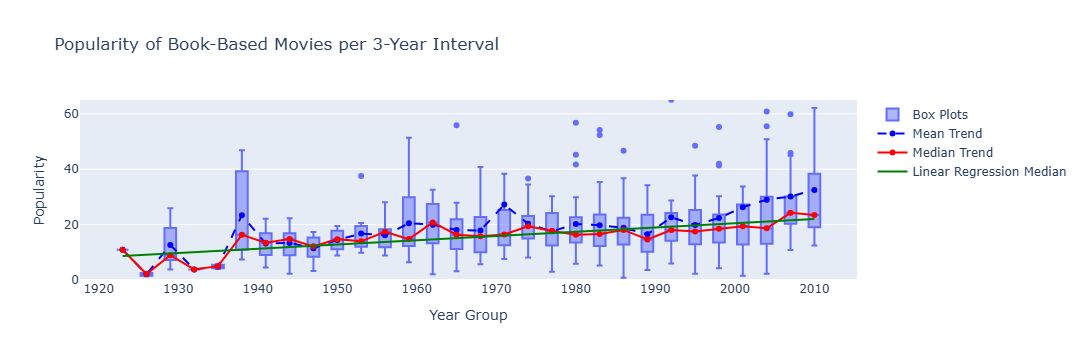

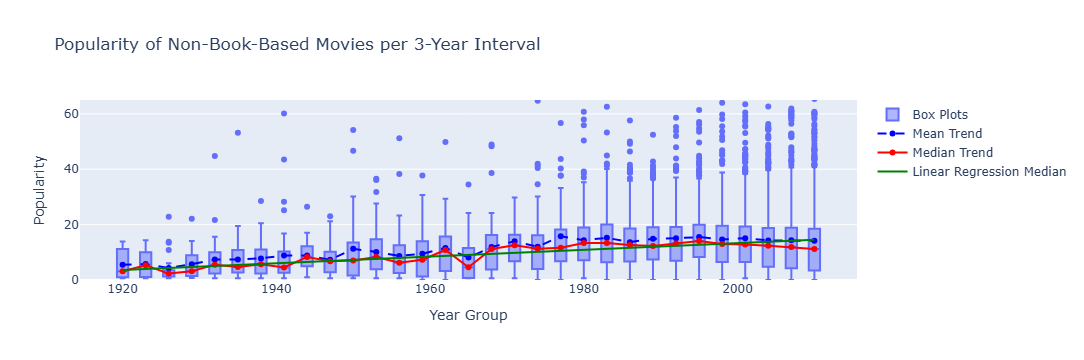

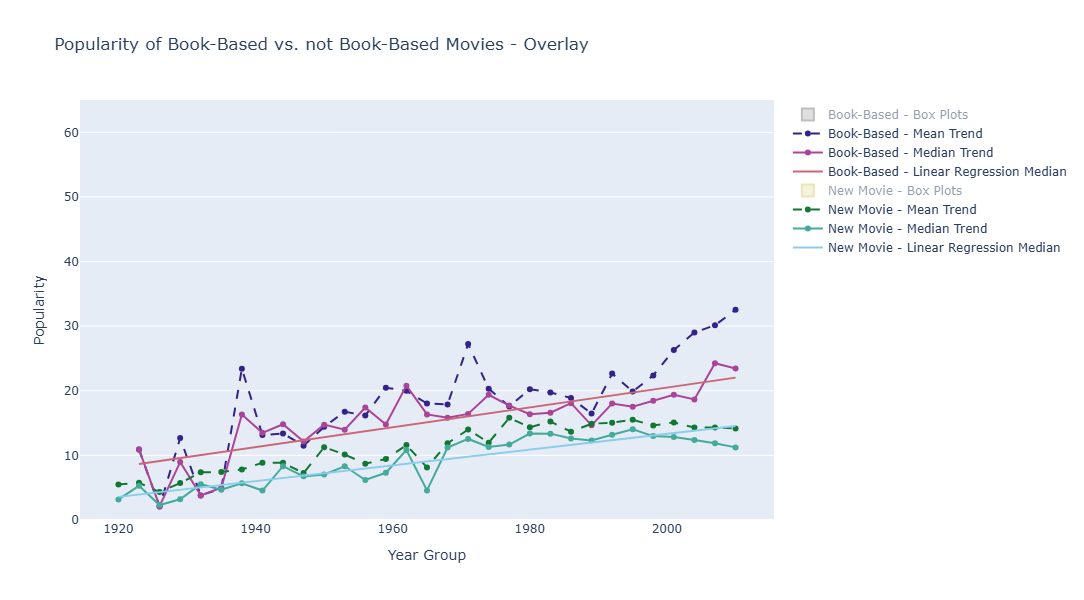

In [5]:
from utils.features_over_time_utils import plot_box_with_trends_over_time, overlay_two_figures

fig_popularity_book_based = plot_box_with_trends_over_time(
    based_on_books_df,
    column_name='popularity',
    title='Popularity of Book-Based Movies per 3-Year Interval',
    y_axis_label='Popularity',
    y_axis_range=(0, 65),
    should_save_to_html=True
)

fig_popularity_not_book_based = plot_box_with_trends_over_time(
    not_based_on_books_df,
    column_name='popularity',
    title='Popularity of Non-Book-Based Movies per 3-Year Interval',
    y_axis_label='Popularity',
    y_axis_range=(0, 65),
    should_save_to_html=True
)

overlayed_fig = overlay_two_figures(
    "Popularity of Book-Based vs. not Book-Based Movies", 
    fig_popularity_book_based, 
    fig_popularity_not_book_based, 
    figure_1_type='Book-Based', 
    figure_2_type='New Movie', 
    y_axis_range=(0, 65),
    should_save_to_html=True
)

print("\n\n")

# fig_popularity_book_based = plot_box_with_trends_over_time(
#     based_on_books_df,
#     column_name='popularity',
#     title='Popularity of Book-Based Movies per 3-Year Interval',
#     y_axis_label='Popularity',
#     use_log_y=True,
# )
# 
# fig_popularity_not_book_based = plot_box_with_trends_over_time(
#     not_based_on_books_df,
#     column_name='popularity',
#     title='Popularity of Non-Book-Based Movies per 3-Year Interval',
#     y_axis_label='Popularity',
#     use_log_y=True,
# )

## Budget over time

In [5]:
fig_budget_book_based = plot_box_with_trends_over_time(
    based_on_books_df,
    column_name='adjusted_budget',
    title='Budget of Book-Based Movies per 3-Year Interval',
    y_axis_label='Budget',
    y_axis_range=(0, 1e8),
    use_exponential_regression=True,
    should_save_to_html=True
)

fig_budget_not_book_based = plot_box_with_trends_over_time(
    not_based_on_books_df,
    column_name='adjusted_budget',
    title='Budget of Non-Book-Based Movies per 3-Year Interval',
    y_axis_label='Budget',
    y_axis_range=(0, 1e8),
    use_exponential_regression=True,
    should_save_to_html=True
)

overlayed_fig = overlay_two_figures(
    "Budget of Book-Based vs. not Book-Based Movies", 
    fig_budget_book_based, 
    fig_budget_not_book_based, 
    figure_1_type='Book-Based', 
    figure_2_type='New Movie', 
    y_axis_range=(0, 1e8),
    should_save_to_html=True
)

## Revenue over time

In [6]:
fig_revenue_book_based = plot_box_with_trends_over_time(
    based_on_books_df,
    column_name='adjusted_revenue',
    title='Revenue of Book-Based Movies per 3-Year Interval',
    y_axis_label='Revenue',
    y_axis_range=(0, 3e8),
    use_exponential_regression=True,
    should_save_to_html=True
)

fig_revenue_non_book_based = plot_box_with_trends_over_time(
    not_based_on_books_df,
    column_name='adjusted_revenue',
    title='Revenue of Non-Book-Based Movies per 3-Year Interval',
    y_axis_label='Revenue',
    y_axis_range=(0, 3e8),
    use_exponential_regression=True,
    should_save_to_html=True
)

overlayed_fig = overlay_two_figures(
    "Revenue of Book-Based vs. not Book-Based Movies", 
    fig_revenue_book_based, 
    fig_revenue_non_book_based, 
    figure_1_type='Book-Based', 
    figure_2_type='New Movie', 
    y_axis_range=(0, 3e8),
    should_save_to_html=True
)

## Revenue - Budget over time

C:\Users\LucaS\AppData\Local\Temp\ipykernel_31656\1643661355.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LucaS\AppData\Local\Temp\ipykernel_31656\1643661355.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



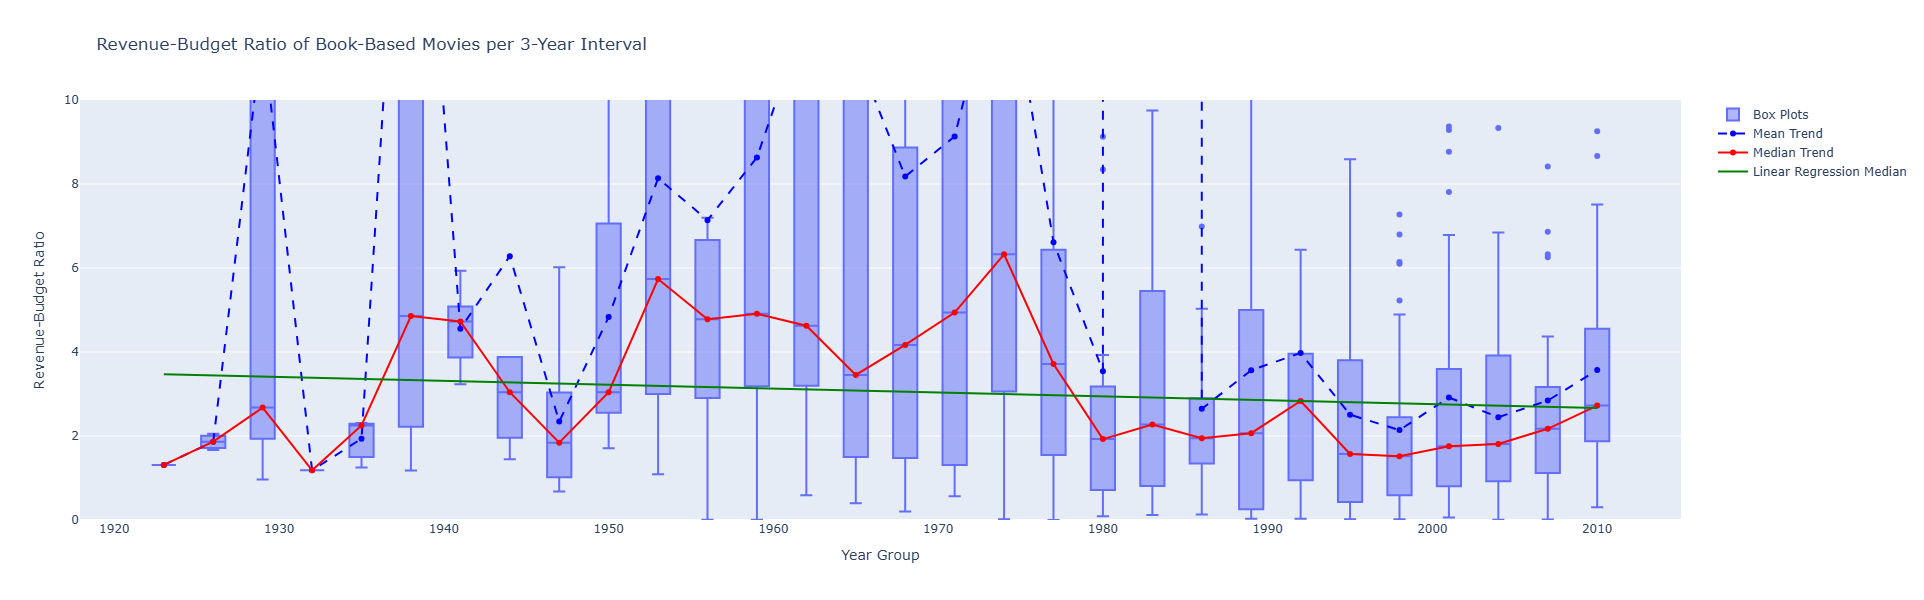

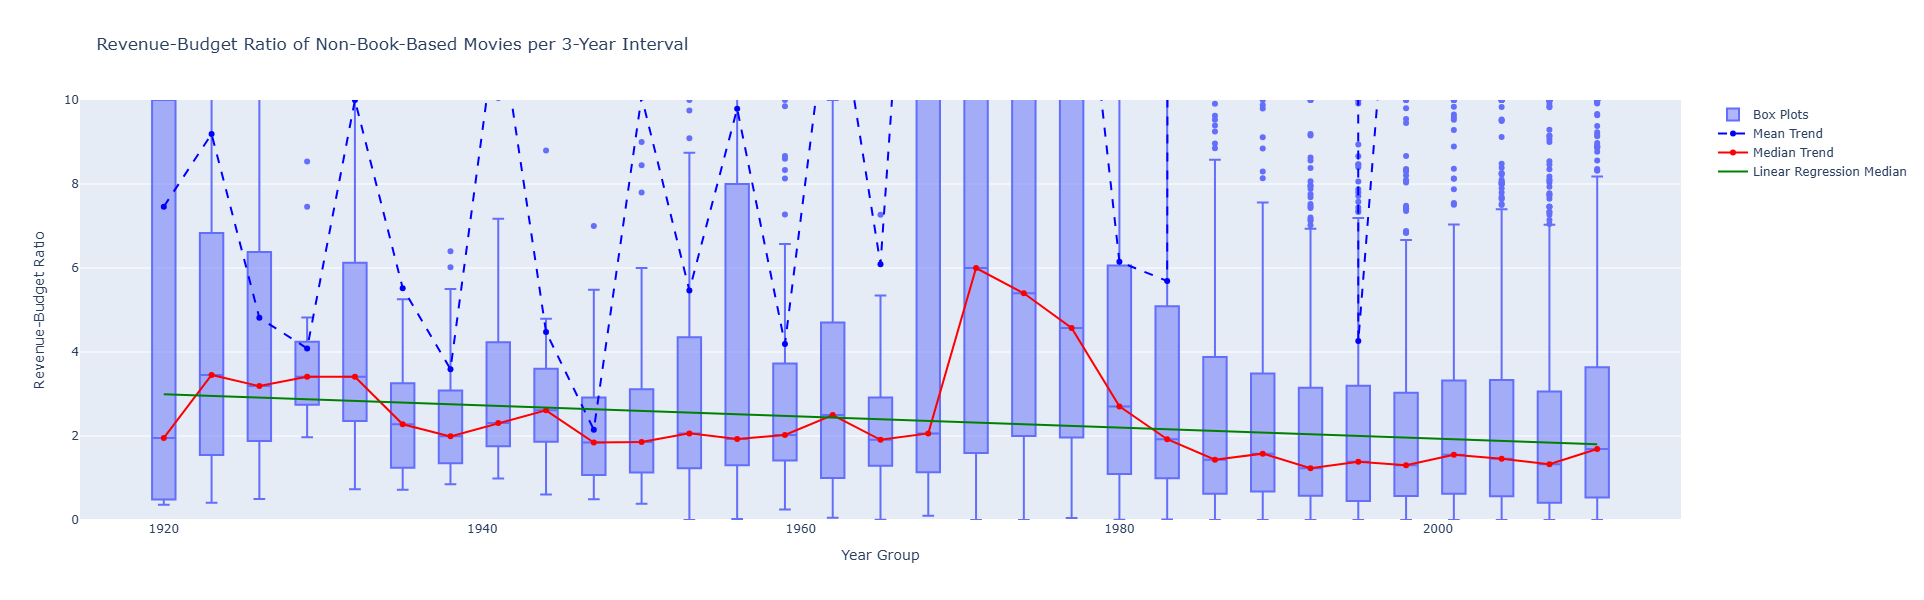

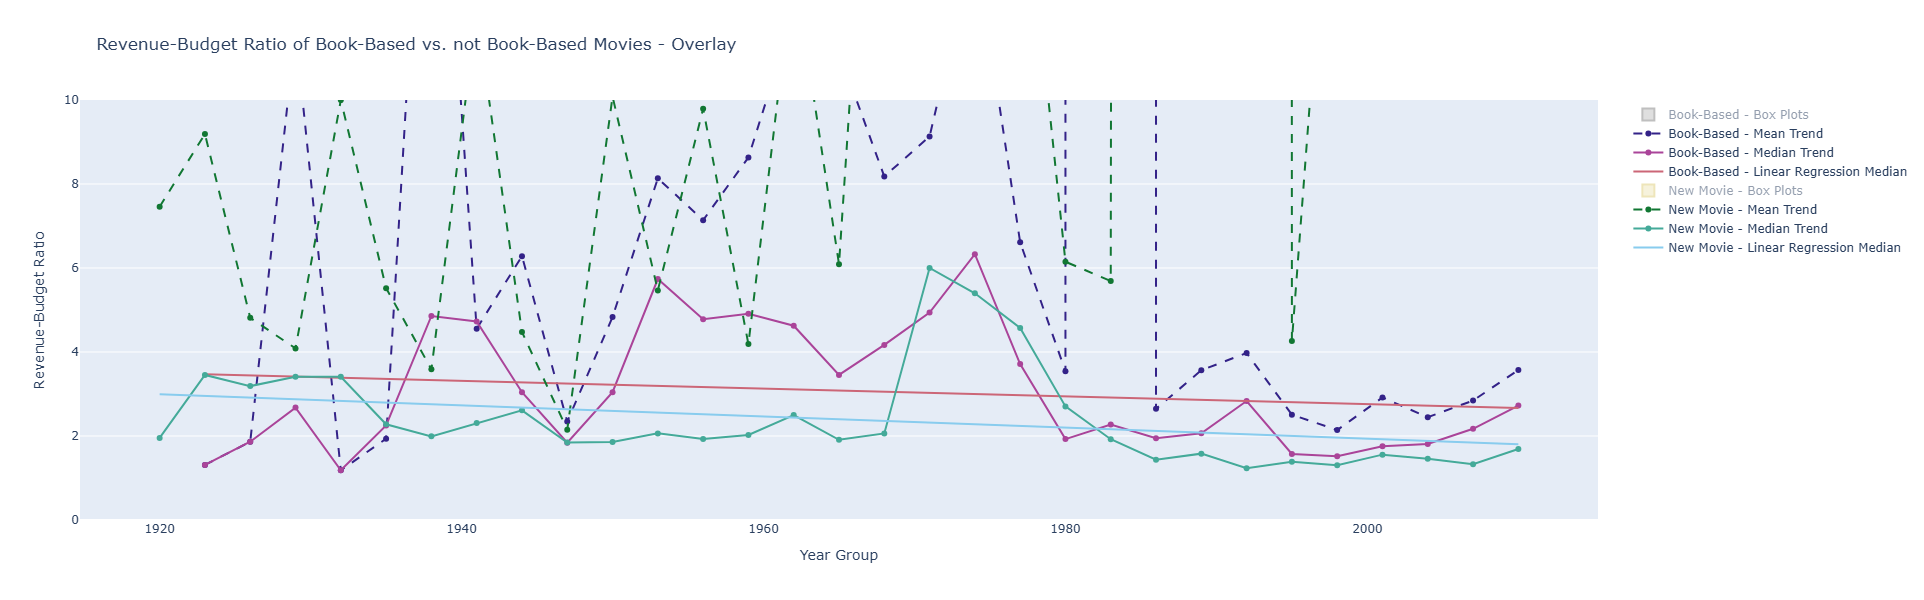

In [7]:
based_on_books_df['revenue_budget_ratio'] = based_on_books_df['adjusted_revenue'] / based_on_books_df['adjusted_budget']
not_based_on_books_df['revenue_budget_ratio'] = not_based_on_books_df['adjusted_revenue'] / not_based_on_books_df['adjusted_budget']

fig_revenue_budget_ratio_book_based = plot_box_with_trends_over_time(
    based_on_books_df,
    column_name='revenue_budget_ratio',
    title='Revenue-Budget Ratio of Book-Based Movies per 3-Year Interval',
    y_axis_label='Revenue-Budget Ratio',
    y_axis_range=(0, 10),
    should_save_to_html=True
)

fig_revenue_budget_ratio_non_book_based = plot_box_with_trends_over_time(
    not_based_on_books_df,
    column_name='revenue_budget_ratio',
    title='Revenue-Budget Ratio of Non-Book-Based Movies per 3-Year Interval',
    y_axis_label='Revenue-Budget Ratio',
    y_axis_range=(0, 10),
    should_save_to_html=True
)

overlayed_fig = overlay_two_figures(
    "Revenue-Budget Ratio of Book-Based vs. not Book-Based Movies", 
    fig_revenue_budget_ratio_book_based, 
    fig_revenue_budget_ratio_non_book_based, 
    figure_1_type='Book-Based', 
    figure_2_type='New Movie', 
    y_axis_range=(0, 10),
    should_save_to_html=True
)


C:\Users\LucaS\AppData\Local\Temp\ipykernel_31656\40853132.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LucaS\AppData\Local\Temp\ipykernel_31656\40853132.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



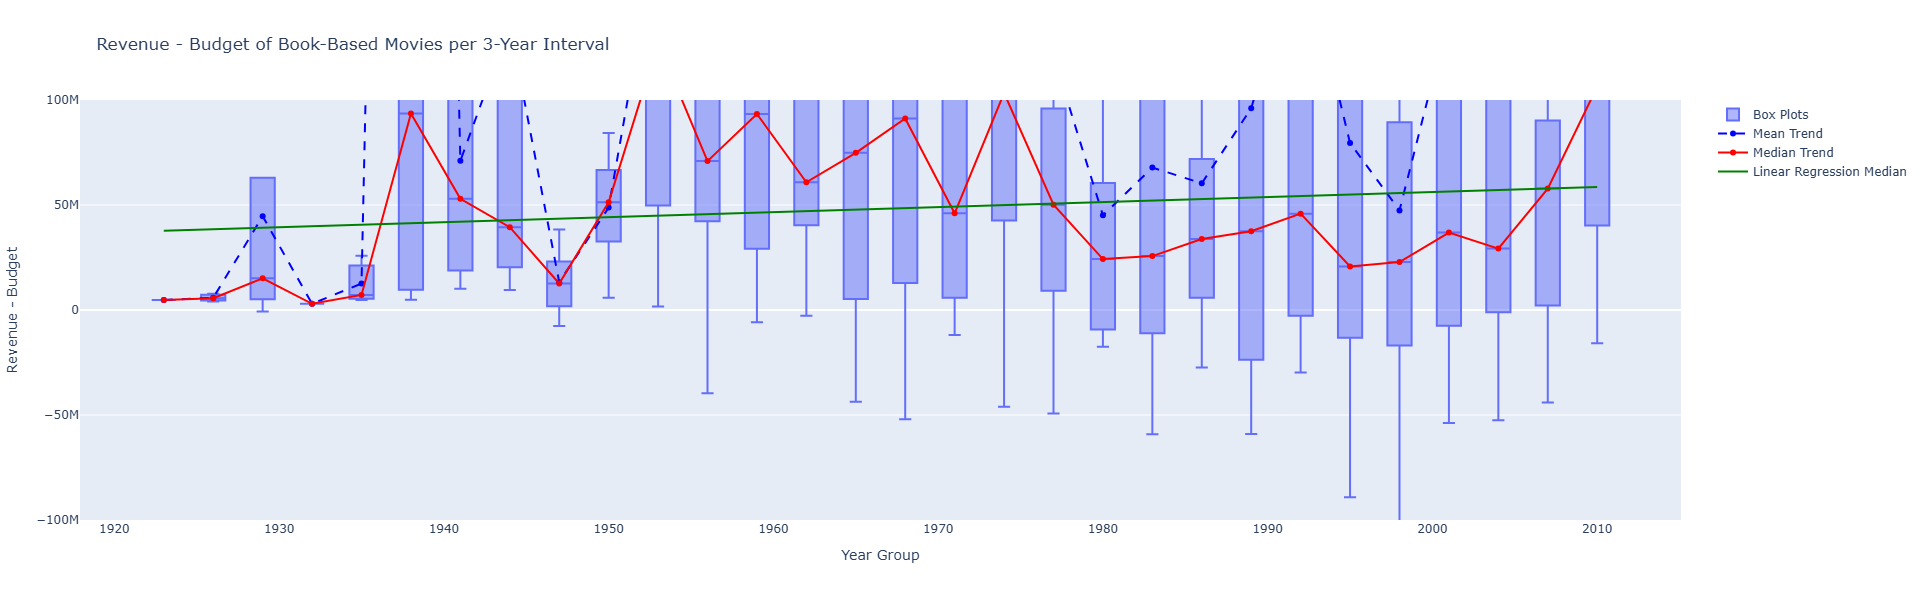

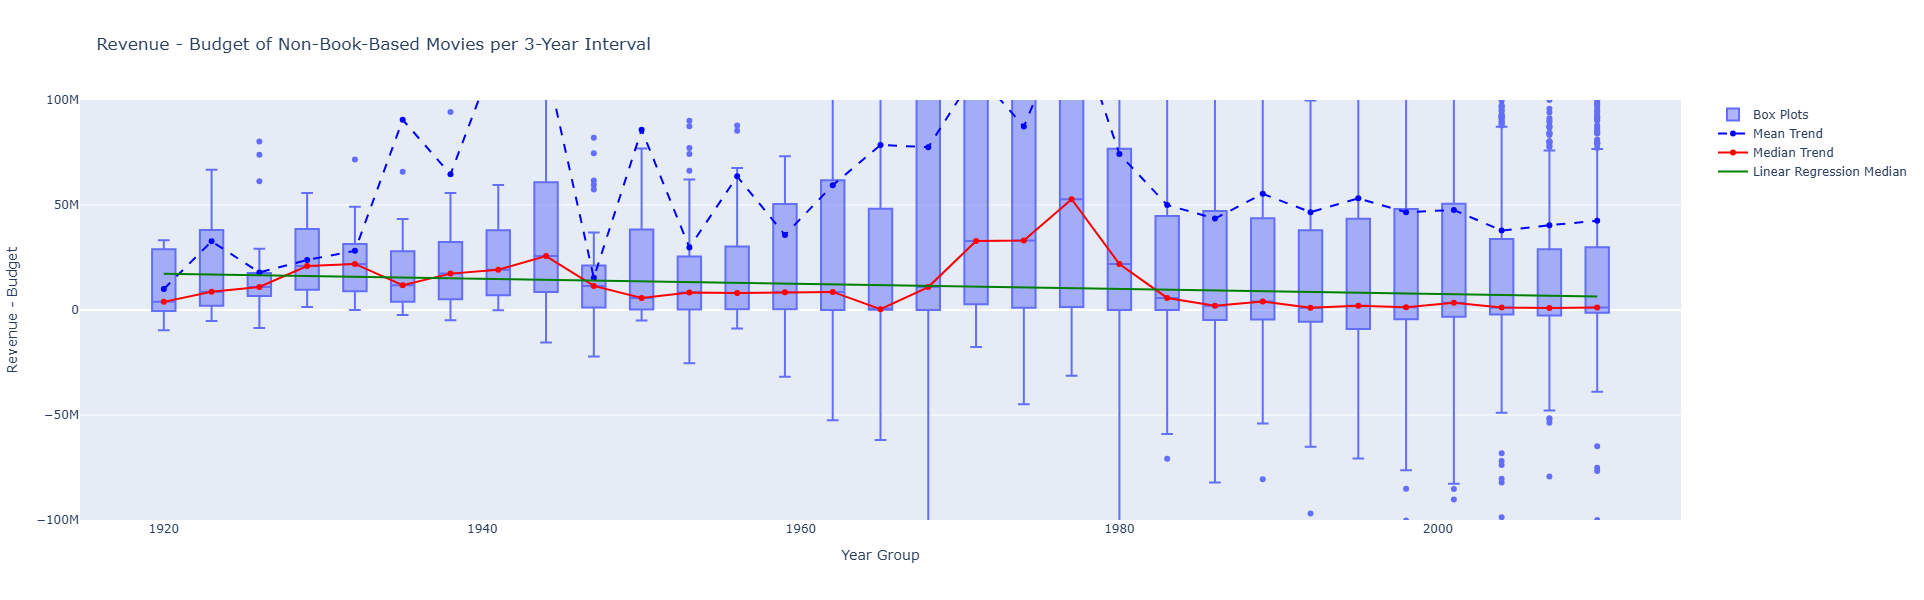

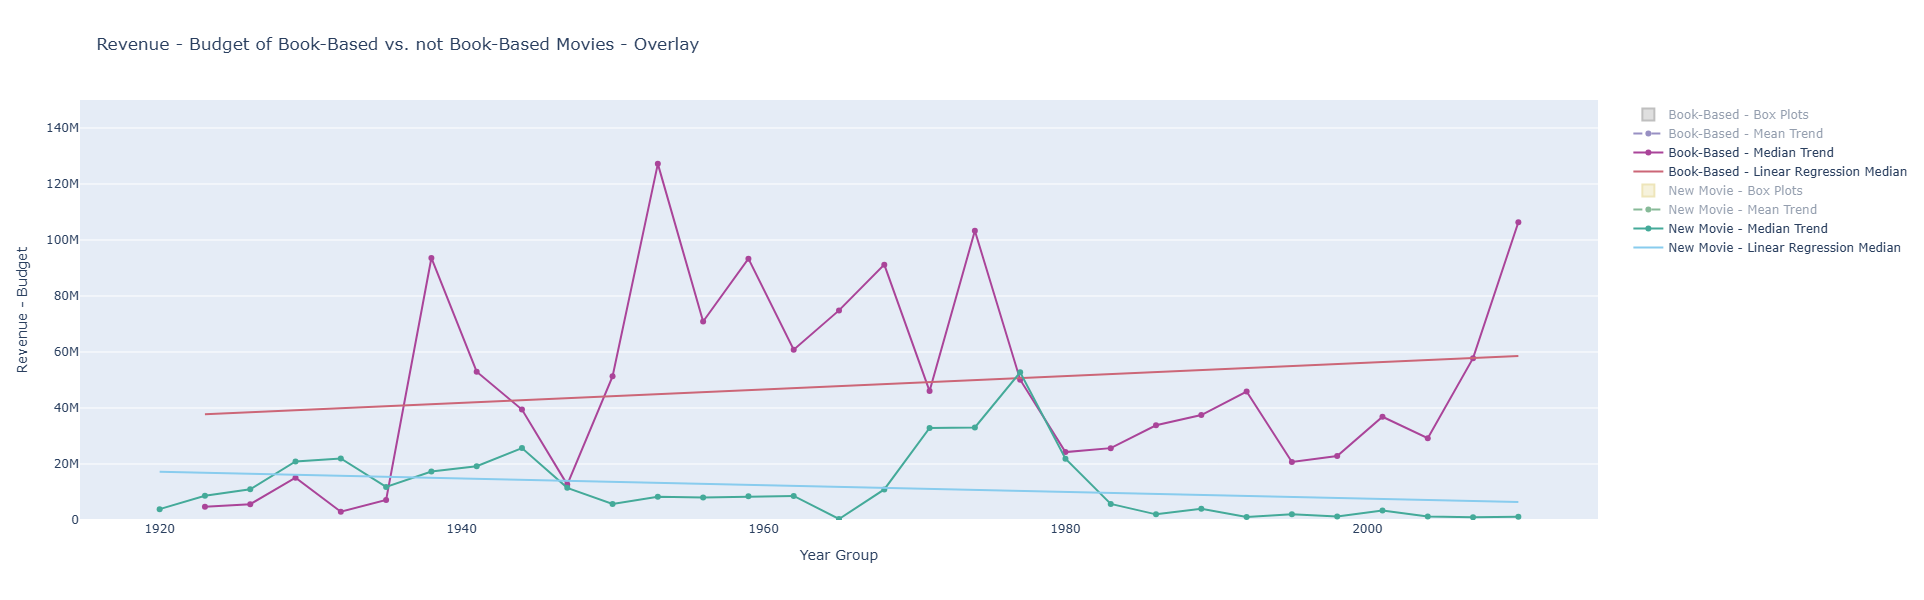

In [8]:
based_on_books_df['revenue_minus_budget'] = based_on_books_df['adjusted_revenue'] - based_on_books_df['adjusted_budget']
not_based_on_books_df['revenue_minus_budget'] = not_based_on_books_df['adjusted_revenue'] - not_based_on_books_df['adjusted_budget']

fig_revenue_minus_budget_book_based = plot_box_with_trends_over_time(
    based_on_books_df,
    column_name='revenue_minus_budget',
    title='Revenue - Budget of Book-Based Movies per 3-Year Interval',
    y_axis_label='Revenue - Budget',
    y_axis_range=(-1e8, 1e8),
    should_save_to_html=True
)

fig_revenue_minus_budget_non_book_based = plot_box_with_trends_over_time(
    not_based_on_books_df,
    column_name='revenue_minus_budget',
    title='Revenue - Budget of Non-Book-Based Movies per 3-Year Interval',
    y_axis_label='Revenue - Budget',
    y_axis_range=(-1e8, 1e8),
    should_save_to_html=True
)

overlayed_fig = overlay_two_figures(
    "Revenue - Budget of Book-Based vs. not Book-Based Movies", 
    fig_revenue_minus_budget_book_based, 
    fig_revenue_minus_budget_non_book_based, 
    figure_1_type='Book-Based', 
    figure_2_type='New Movie', 
    y_axis_range=(0, 1.5e8),
    should_save_to_html=True,
    should_display_means=False
)

## Number of movies based on books over time

In [9]:
from utils.features_over_time_utils import plot_movie_count_over_time

plot_movie_count_over_time(
    based_on_books_df,
    release_date_column='release_date',
    title='Number of Movies Based on Books per 3-Year Interval'
)

plot_movie_count_over_time(
    not_based_on_books_df,
    release_date_column='release_date',
    title='Number of Movies Not Based on Books per 3-Year Interval'
)

## Number of languages per movie over time

In [10]:


fig = plot_box_with_trends_over_time(
    based_on_books_df,
    column_name='num_languages',
    title='Number of Languages per Book-Based Movie per 3-Year Interval',
    y_axis_label='Number of Languages',
)

fig = plot_box_with_trends_over_time(
    not_based_on_books_df,
    column_name='num_languages',
    title='Number of Languages per Non-Book-Based Movie per 3-Year Interval',
    y_axis_label='Number of Languages',
)

C:\Users\LucaS\anaconda3\envs\ada-project\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide



---

In [11]:
summaries_df = load_dataset("ada-datadruids/bookfilm_summaries_with_similarity_and_sentiment")['train'].to_pandas()

summaries_df.head()

movie_id                    book_title  \
0    196176  The Siege of Trencher's Farm   
1   6703617           Journey to the West   
2  24416479              The Beast Master   
3   9384481                  The Blessing   
4  22224559                 The Last Song   

                                  movie_name  \
0                                 Straw Dogs   
1                      The Forbidden Kingdom   
2  Beastmaster 2: Through the Portal of Time   
3                       Count Your Blessings   
4                              The Last Song   

                                        book_summary  \
0   George Magruder, an American professor of Eng...   
1   The novel has 100 chapters. These can be divi...   
2   It tells the story of Hosteen Storm, an ex-so...   
3   It is set in the post-war World War II period...   
4   Veronica “Ronnie” Miller’s life was turned up...   

                                        film_summary  similarity  \
0  David Sumner , a timid American mathematician,...    0.451876   
1  In this film, which is based loosely on the an...    0.559594   
2  Dar, the Beastmaster , is back and now he has ...    0.344548   
3  While visiting Grace Allingham in wartime Lond...    0.669707   
4  At seventeen, Veronica "Ronnie" Miller  remain...    0.852735   

  film_sentiment  film_sentiment_score book_sentiment  book_sentiment_score  
0       positive              0.333608       positive              0.994480  
1       positive              0.995482       positive              0.995404  
2       positive              0.997562       positive              0.998812  
3       positive              0.996070       positive              0.996607  
4       positive              0.978184       positive              0.998164

In [12]:
final_df = pd.read_csv("./../data/final_dataset.csv")

print(len(final_df))
#only take movies that are after 1920 and before 2013 because there is not enough data for the other years
final_df = final_df[final_df['release_date'] > '1920-01-01']
final_df = final_df[final_df['release_date'] < '2013-01-01']

# interpret movie_id as integer in summaries_df and merge on movie_id with final_df
summaries_df['movie_id'] = summaries_df['movie_id'].astype(int)
book_based_final_df = final_df.merge(summaries_df, on='movie_id', how='inner')

print("book_based length:", len(book_based_final_df))
book_based_final_df.head()

1845
book_based length: 829


Unnamed: 0  movie_id movie_cluster  \
0           5    196176     /m/01bwgr   
1           6   6703617     /m/0gj6pd   
2           7  24416479    /m/07s7_c0   
3           8   9384481    /m/0286qw2   
4          14  22224559    /m/07ykkx5   

                                movie_name_x release_date  runtime_x  \
0                                 Straw Dogs   1971-11-03      118.0   
1                      The Forbidden Kingdom   2008-04-04      105.0   
2  Beastmaster 2: Through the Portal of Time   1991-08-31      107.0   
3                       Count Your Blessings         1959      102.0   
4                              The Last Song   2010-03-31      107.0   

                                            language  \
0                 {"/m/02h40lc": "English Language"}   
1  {"/m/0653m": "Standard Mandarin", "/m/02h40lc"...   
2                 {"/m/02h40lc": "English Language"}   
3                 {"/m/02h40lc": "English Language"}   
4                 {"/m/02h40lc": "English Language"}   

                                             country  \
0  {"/m/09c7w0": "United States of America", "/m/...   
1  {"/m/09c7w0": "United States of America", "/m/...   
2          {"/m/09c7w0": "United States of America"}   
3          {"/m/09c7w0": "United States of America"}   
4          {"/m/09c7w0": "United States of America"}   

                                              genres  movie_year  ...  \
0   {"/m/01jfsb": "Thriller", "/m/07s9rl0": "Drama"}        1971  ...   
1  {"/m/08322": "Wuxia", "/m/0hj3n2k": "Fantasy A...        2008  ...   
2  {"/m/0dz8b": "Sword and sorcery", "/m/06n90": ...        1991  ...   
3      {"/m/07s9rl0": "Drama", "/m/01z4y": "Comedy"}        1959  ...   
4  {"/m/01j1n2": "Coming of age", "/m/07s9rl0": "...        2010  ...   

   review_count                    book_title  \
0          54.0  The Siege of Trencher's Farm   
1         420.0           Journey to the West   
2          68.0              The Beast Master   
3         127.0                  The Blessing   
4       11534.0                 The Last Song   

                                movie_name_y  \
0                                 Straw Dogs   
1                      The Forbidden Kingdom   
2  Beastmaster 2: Through the Portal of Time   
3                       Count Your Blessings   
4                              The Last Song   

                                        book_summary  \
0   George Magruder, an American professor of Eng...   
1   The novel has 100 chapters. These can be divi...   
2   It tells the story of Hosteen Storm, an ex-so...   
3   It is set in the post-war World War II period...   
4   Veronica “Ronnie” Miller’s life was turned up...   

                                        film_summary similarity  \
0  David Sumner , a timid American mathematician,...   0.451876   
1  In this film, which is based loosely on the an...   0.559594   
2  Dar, the Beastmaster , is back and now he has ...   0.344548   
3  While visiting Grace Allingham in wartime Lond...   0.669707   
4  At seventeen, Veronica "Ronnie" Miller  remain...   0.852735   

   film_sentiment  film_sentiment_score book_sentiment  book_sentiment_score  
0        positive              0.333608       positive              0.994480  
1        positive              0.995482       positive              0.995404  
2        positive              0.997562       positive              0.998812  
3        positive              0.996070       positive              0.996607  
4        positive              0.978184       positive              0.998164  

[5 rows x 39 columns]

## 'normalized_rating_x' over time

In [13]:
fig = plot_box_with_trends_over_time(
    book_based_final_df,
    column_name='normalized_rating_x',
    title='Normalized Rating x of Book-Based Movies per 3-Year Interval',
    y_axis_label='Normalized Rating',
    y_axis_range=(0, 1),
)

## 'normalized_rating_y' over time

In [14]:
fig = plot_box_with_trends_over_time(
    book_based_final_df,
    column_name='normalized_rating_y',
    title='Normalized Rating y of Books per 3-Year Interval',
    y_axis_label='Normalized Rating',
    y_axis_range=(0.3, 0.9),
)

## 'similarity' feature over time

In [15]:
fig = plot_box_with_trends_over_time(
    book_based_final_df,
    column_name='similarity',
    title='Book-Movie Summary Similarity per 3-Year Interval',
    y_axis_label='Summary Embedding Cosine Similarity',
    should_save_to_html=True
)

## 'sentiment' feature difference over time

In [16]:
# as float
book_based_final_df['film_sentiment_score'] = book_based_final_df['film_sentiment_score'].astype(float)
book_based_final_df['book_sentiment_score'] = book_based_final_df['book_sentiment_score'].astype(float)
book_based_final_df['sentiment_difference_movie_book'] = book_based_final_df['film_sentiment_score'] - book_based_final_df['book_sentiment_score']

book_based_final_df['sentiment_difference_movie_book'].describe()

count    829.000000
mean      -0.104786
std        0.644145
min       -1.993367
25%       -0.289051
50%       -0.001589
75%        0.015245
max        1.994675
Name: sentiment_difference_movie_book, dtype: float64

In [17]:
fig = plot_box_with_trends_over_time(
    book_based_final_df,
    column_name='sentiment_difference_movie_book',
    title='Book-Movie Summary Sentiment Difference per 3-Year Interval',
    y_axis_label='Summary Sentiment Difference',
    should_save_to_html=True
)